## Практикуемся решать задачу регрессии!

### Будем предсказывать цену дома 📝

ВАЖНО: При построении графиков не забывайте указать название графика и обозначить, что изображено по каждой из осей

В блоке ниже импортируйте все библиотеки, которые вам понадобятся для запуска ноутбука

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# some lib

**Скачайте необходимые данные по ссылке: https://www.kaggle.com/c/house-prices-advanced-regression-techniques**

In [ ]:
data = pd.read_csv('train.csv', header=0)

✅ Посмотрите, как выглядят данные, и приступайте к анализу

SalePrice — цена продажи недвижимости в долларах. Это целевая переменная, которую вы пытаетесь предсказать.

MSSubClass : класс здания

MSZoning : Общая классификация зонирования

LotFrontage : Линейные футы улицы, примыкающей к участку

LotArea : Размер участка в квадратных футах

Улица : Тип подъездной дороги

Аллея : Тип доступа к аллее

LotShape : Общая форма собственности

LandContour : Ровность участка

Коммунальные услуги : Тип доступных коммунальных услуг

LotConfig : Конфигурация лота

LandSlope : Уклон участка

Район : Физические местоположения в пределах города Эймс

Условие 1 : Близость к главной дороге или железной дороге

Условие 2 : Близость к главной дороге или железной дороге (если есть вторая)

BldgType : Тип жилья

HouseStyle : Стиль жилища

OverallQual : Общее качество материалов и отделки

OverallCond : Общая оценка состояния

Год постройки : Первоначальная дата постройки

YearRemodAdd : Дата реконструкции

RoofStyle : Тип крыши

RoofMatl : Кровельный материал

Exterior1st : Внешняя отделка дома

Exterior2nd : Внешняя отделка дома (если использовано более одного материала)

MasVnrType : Тип облицовки каменной кладкой

MasVnrArea : Площадь облицовки каменной кладкой в ​​квадратных футах

ExterQual : Качество внешнего материала

ExterCond : Текущее состояние материала снаружи

Фундамент : Тип фундамента

BsmtQual : Высота подвала

BsmtCond : Общее состояние подвала

BsmtExposure : Стены подвала на уровне выхода или сада

BsmtFinType1 : Качество отделки подвала

BsmtFinSF1 : Тип 1 готовые квадратные футы

BsmtFinType2 : Качество второй обработанной области (если присутствует)

BsmtFinSF2 : Тип 2, готовые квадратные футы

BsmtUnfSF : Неотделанные квадратные футы площади подвала

TotalBsmtSF : Общая площадь подвала в квадратных футах

Отопление : Тип отопления

HeatingQC : Качество и состояние отопления

CentralAir : Центральное кондиционирование воздуха

Электрика : Электрическая система

1stFlrSF : Первый этаж, кв. футы

2ndFlrSF : Второй этаж, кв. футы

LowQualFinSF : Низкое качество отделки квадратных футов (все этажи)

GrLivArea : жилая площадь над уровнем земли (квадратные футы)

BsmtFullBath : Ванные комнаты в подвале

BsmtHalfBath : Подвальные ванные комнаты

FullBath : Полноценные ванные комнаты выше уровня земли

HalfBath : Половина ванны выше уровня земли

Спальня : Количество спален выше цокольного этажа

Кухня : Количество кухонь

KitchenQual : Качество кухни

TotRmsAbvGrd : Общее количество комнат выше уровня земли (без учета ванных комнат)

Функциональность : Оценка функциональности дома

Камины : Количество каминов

FireplaceQu : Качество камина

GarageType : Расположение гаража

GarageYrBlt : Год постройки гаража

GarageFinish : Внутренняя отделка гаража

GarageCars : Размер гаража в единицах вместимости автомобиля

GarageArea : Площадь гаража в квадратных футах

GarageQual : Качество гаража

GarageCond : Состояние гаража

PavedDrive : Асфальтированная подъездная дорога

WoodDeckSF : Площадь деревянной террасы в квадратных футах

OpenPorchSF : Площадь открытого крыльца в квадратных футах

EnclosedPorch : Площадь закрытого крыльца в квадратных футах

3SsnPorch : Площадь веранды, рассчитанная на три сезона, в квадратных футах

ScreenPorch : Площадь веранды в квадратных футах

PoolArea : Площадь бассейна в квадратных футах

PoolQC : Качество пула

Забор : Качество забора

MiscFeature : Разные функции, не охваченные другими категориями.

MiscVal : $Value разного признака ❌

MoSold : Месяц продажи ❌

YrSold : Год продажи ❌

SaleType : Тип продажи ❌

Состояние продажи : Состояние продажи ❌

In [ ]:
data.shape

(1460, 81)

In [ ]:
pd.concat([data.head(), data.tail()])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

✅ Если в данных бессмысленные столбцы? Если да, избавьтесь от них и объясните, почему так поступили.

MiscVal : $Value разного признака ❌

MoSold : Месяц продажи ❌

YrSold : Год продажи ❌

SaleType : Тип продажи ❌

Состояние продажи : Состояние продажи ❌

Избавляемся от этих признаков, потому что я считаю эти внешние факторы не способны оказать влияние на цену дома.

In [ ]:
data = data.drop(labels = ['MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], axis = 1)

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,61,0,0,0,0,NaN,NaN,NaN,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,298,0,0,0,0,0,NaN,NaN,NaN,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,42,0,0,0,0,NaN,NaN,NaN,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,35,272,0,0,0,NaN,NaN,NaN,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,192,84,0,0,0,0,NaN,NaN,NaN,250000


✅ Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

В некоторых столбцах пропусков больше, чем значений в этих столбцах. В признаках аллея, FireplaceQu, PoolQC, Fence, MiscFeature больше всего пропусков. Это значит, что в основном у дома в адресе нет аллеи, нет дополнительных характеристик, не указанных в задании. В основном у дома либо нет бассейна, либо его качество не определено, также как и в случае с камином и забором.

In [ ]:
data.isna().sum() / data.shape[0]

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,0.177397
LotArea,0.000000
...,...
PoolArea,0.000000
PoolQC,0.995205
Fence,0.807534
MiscFeature,0.963014


✅ Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение.

На самом деле я бы избавился от признаков, где доля пропущенных значений больше, чем 50%, так как рассматривать такие признаки для прогнозирование цены дома по моему мнению необъективно, а в остальных случаях заменил на медианное значение признака.

In [ ]:
NA_values = pd.DataFrame(((data.isna().sum() / data.shape[0]) * 100), columns = ['fraction'])

NA_values_more_50 = NA_values[NA_values['fraction'] > 50.0]

NA_values_more_50

,fraction
Alley,93.767123
MasVnrType,59.726027
PoolQC,99.520548
Fence,80.753425
MiscFeature,96.301370


In [ ]:
data = data.drop(labels = ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [ ]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

In [ ]:
object_columns = data.select_dtypes(include = [object]).columns
data[object_columns] = data[object_columns].fillna('No Info')

✅ Проверьте, что вы действительно избавились от пропусков

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

✅ Обработайте категориальные признаки. Объясните выбор метода (one-hot-encoding, label encoding, ...)

Все категориальные признаки будут преобразованы с помощью one-hot-encoding, чтобы компенсировать главный минус label encoding - создание порядка там, где его нет.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = True, drop = 'first')
X_object = data.select_dtypes(include=[object])
ohe.fit(X_object)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', sparse=True)

In [ ]:
codes = ohe.transform(X_object).toarray()
feature_names = ohe.get_feature_names_out(X_object.columns)
data_coded = data.select_dtypes(exclude=[object])
data_ohe = pd.concat([data_coded, pd.DataFrame(codes, columns = feature_names).astype(int)], axis = 1)

data_ohe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageQual_No Info,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Info,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,1,0,0,0,0,1,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,1,0,0,0,0,1,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,1,0,0,0,0,1,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,1,0,0,0,0,1,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,1,0,0,0,0,1,0,1
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,1,0,0,0,0,1,0,1
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,1,0,0,0,0,1,0,1
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,1,0,0,0,0,1,0,1


In [ ]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 230 entries, Id to PavedDrive_Y
dtypes: float64(3), int64(227)
memory usage: 2.6 MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

columns = data.select_dtypes(include=[object]).columns

for col in columns:
    data[col] = LabelEncoder().fit_transform(data[col])

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,5,5,2,0,61,0,0,0,0,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,5,5,2,298,0,0,0,0,0,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,5,5,2,0,42,0,0,0,0,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,5,5,2,0,35,272,0,0,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,5,5,2,192,84,0,0,0,0,250000


✅ Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

In [ ]:
data.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
Id,1.000000,0.011156,-0.006096,-0.009921,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,...,0.001955,-0.008379,0.005971,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.356718,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,...,-0.038571,-0.045895,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.105961,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,...,-0.162998,-0.102744,-0.100366,-0.009477,-0.154704,0.115509,0.000362,0.019089,-0.003128,-0.166872
LotFrontage,-0.009921,-0.356718,-0.105961,1.000000,0.304522,-0.037349,-0.138877,-0.076080,-0.001027,-0.177821,...,0.093250,0.090704,0.088121,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,0.334771
LotArea,-0.033226,-0.139781,-0.034452,0.304522,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,...,0.053079,0.065741,0.015134,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EnclosedPorch,0.002889,-0.012037,0.115509,0.010287,-0.018340,0.023082,0.078213,-0.058742,-0.009407,-0.070429,...,-0.123735,-0.123126,-0.201697,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,-0.128578
3SsnPorch,-0.046635,-0.043825,0.000362,0.061945,0.020423,0.007473,-0.036459,-0.021404,-0.003046,-0.030479,...,-0.000479,0.018050,0.020527,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.044584
ScreenPorch,0.001330,-0.026030,0.019089,0.037655,0.043160,-0.033160,-0.053054,0.003836,0.102365,-0.004657,...,-0.002089,0.075058,0.050617,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.111447
PoolArea,0.057044,0.008283,-0.003128,0.180819,0.077672,0.004413,-0.020051,-0.013098,-0.001798,-0.046798,...,-0.020344,-0.026767,0.019903,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.092404


<Axes: >

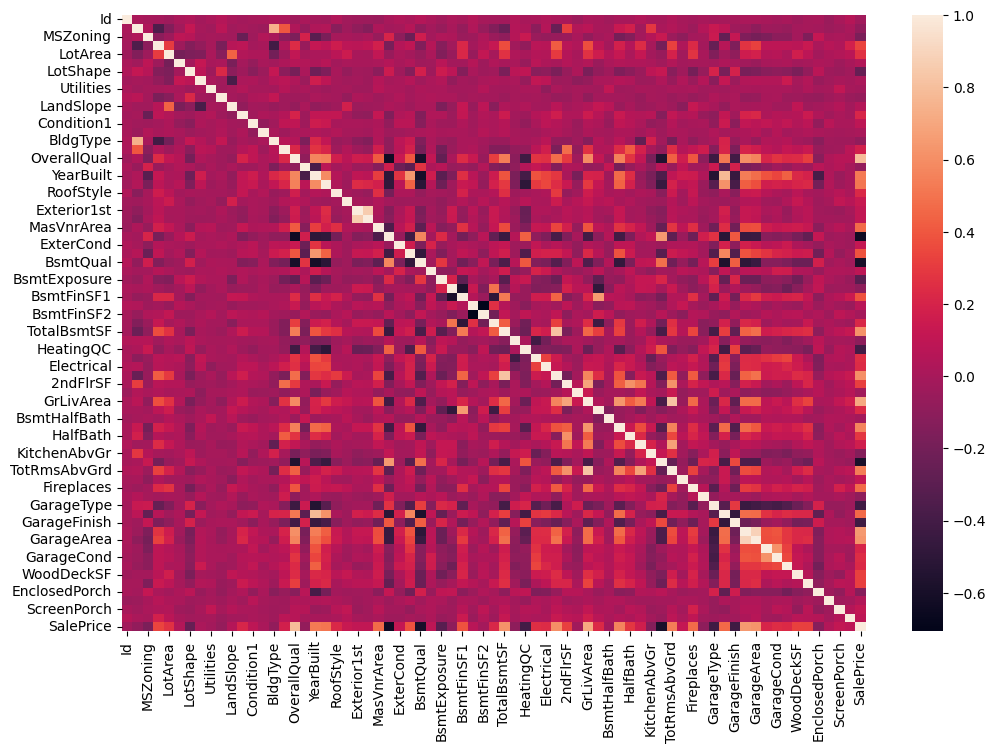

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr())

✅ Найдите признаки с максимальным и минимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

In [ ]:
target = data['SalePrice']

correlations = data.corr(method='pearson')['SalePrice'].drop('SalePrice')

max_corr = correlations.abs().idxmax()
min_corr = correlations.abs().idxmin()

print(f"Признак с максимальной корреляцией: {max_corr}, значение: {correlations[max_corr]}")
print(f"Признак с минимальной корреляцией: {min_corr}, значение: {correlations[min_corr]}")

Признак с максимальной корреляцией: OverallQual, значение: 0.7909816005838053
Признак с минимальной корреляцией: Condition2, значение: 0.0075127340363331


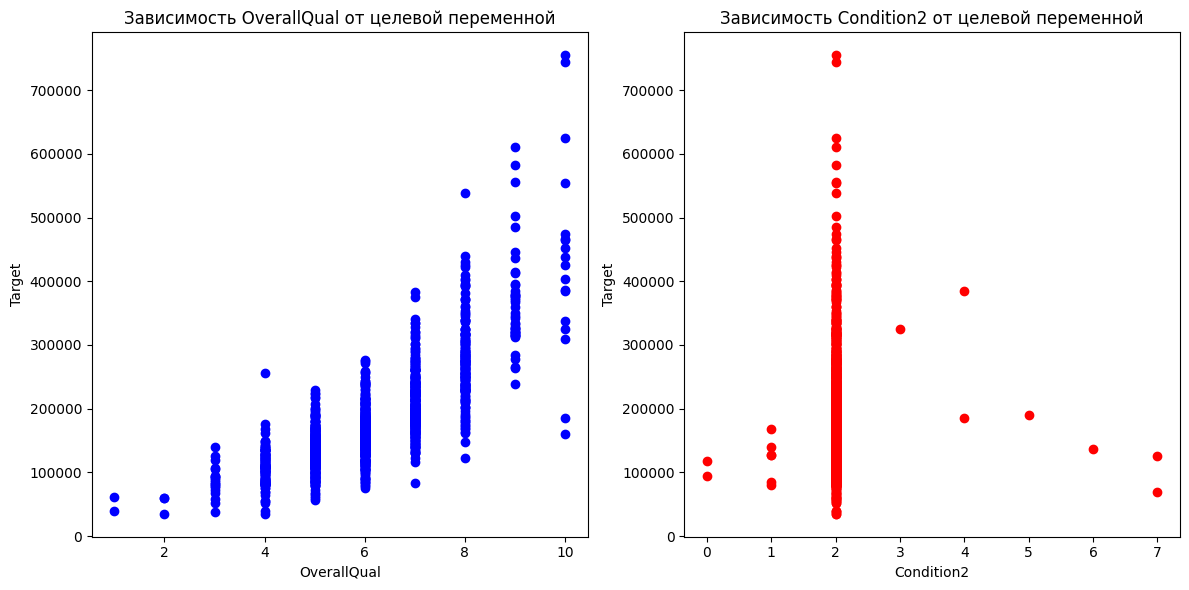

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# График для максимальной корреляции
plt.subplot(1, 2, 1)
plt.scatter(data[max_corr], target, color='blue')
plt.title(f'Зависимость {max_corr} от целевой переменной')
plt.xlabel(max_corr)
plt.ylabel('Target')

# График для минимальной корреляции
plt.subplot(1, 2, 2)
plt.scatter(data[min_corr], target, color='red')
plt.title(f'Зависимость {min_corr} от целевой переменной')
plt.xlabel(min_corr)
plt.ylabel('Target')

plt.tight_layout()
plt.show()

✅ Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального, можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить).

Подсказка: воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

ВАЖНО: далее используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.

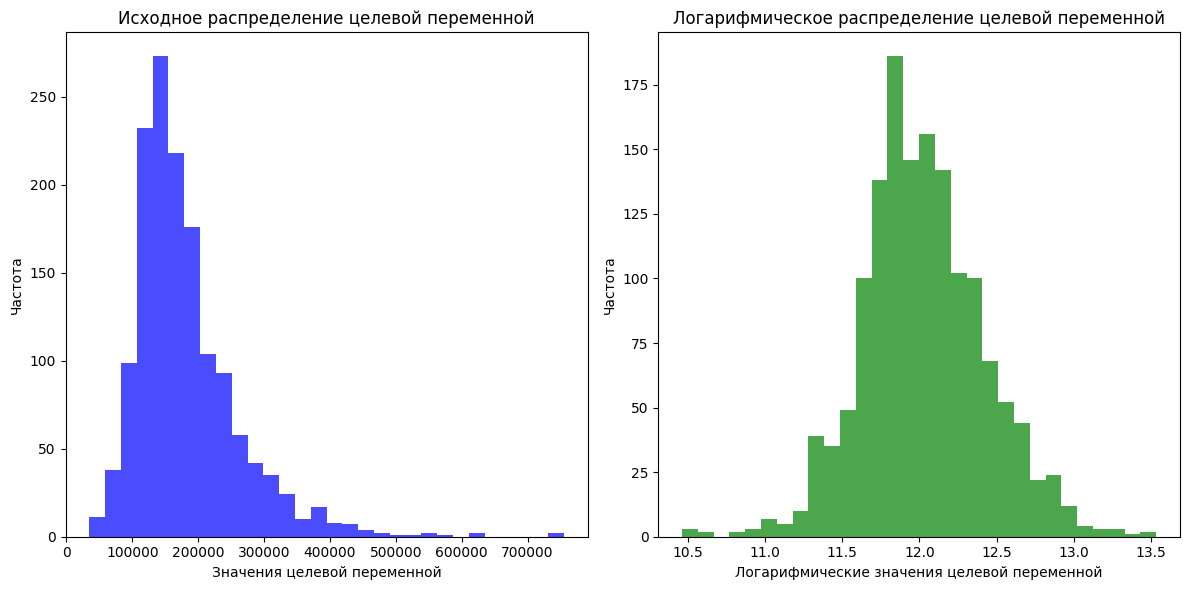

In [ ]:
log_target = np.log1p(target)

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.hist(target, bins = 30, color = 'blue', alpha = 0.7)
plt.title('Исходное распределение целевой переменной')
plt.xlabel('Значения целевой переменной')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(log_target, bins = 30, color = 'green', alpha = 0.7)
plt.title('Логарифмическое распределение целевой переменной')
plt.xlabel('Логарифмические значения целевой переменной')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

✅ Разбейте выборку на обучающую и тестовую в отношении 75:25. Зафиксируйте при разбиении значение `random_state` = 13. Не забывайте прологорифмировать целевую переменную (как в предыдущем задании)

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['SalePrice'], axis = 1)
y = np.log1p(data['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 13)

✅ Примените к данным

- Линейную регрессию
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам
- RMSE
- MAE
- $R^2$

Опишите полученные результаты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
def metrics(y_test, y_pred):
    print(f'RMSE: {mean_squared_error(y_test, y_pred, squared = False)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'R^2: {r2_score(y_test, y_pred)}')
    return

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.coef_

array([-5.63377657e-06,  1.46295891e-04, -1.98200227e-02,  6.04482194e-04,
        2.41613152e-06,  2.76956201e-01, -3.91484714e-03, -5.75773463e-03,
       -1.34927888e-01,  3.85773302e-04, -1.11369735e-02, -3.50054764e-04,
        1.79998771e-03, -2.00897144e-02, -1.49471951e-02, -2.99083651e-03,
        5.23335297e-02,  4.50408119e-02,  2.07355277e-03,  8.85259830e-04,
        1.83745673e-03, -4.66830399e-03, -3.87183927e-03,  3.45710809e-03,
        1.09917638e-05, -2.00903349e-02,  1.14813073e-02,  9.69072846e-03,
       -1.26298435e-02,  1.70391581e-03, -8.70574825e-03, -1.60449988e-03,
        4.66546519e-05,  7.58813812e-03,  4.48933180e-05,  9.05097301e-07,
        9.24530671e-05,  1.79179049e-02, -8.56470937e-03,  6.54545321e-02,
        2.69345184e-03,  1.36778529e-04,  1.06220713e-04, -8.72223556e-05,
        1.55776886e-04,  3.44809581e-02,  7.47080705e-03,  2.64771739e-02,
        1.18150169e-02, -1.14202228e-02, -4.17870524e-02, -4.43315591e-03,
        3.30558404e-03,  

In [ ]:
print('Оценивание качества линейной регрессии по метрикам')
metrics(y_test, linear_reg.predict(X_test))

Оценивание качества линейной регрессии по метрикам
RMSE: 0.22565587601211198
MAE: 0.1037330815130186
R^2: 0.691565675313174


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso_reg = Lasso()
lasso_params = {'alpha' : [x / 100 for x in range(1, 10) ]}
lasso_grid = GridSearchCV(lasso_reg, lasso_params, cv = 10)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                                   0.08, 0.09]})

In [ ]:
print('Lasso Regression metrics:')
metrics(y_test, lasso_grid.best_estimator_.predict(X_test))

Lasso Regression metrics:
RMSE: 0.23939115568126773
MAE: 0.10659080509043198
R^2: 0.6528752242461472


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
ridge_regression = Ridge()
ridge_params = {'alpha' : [x / 10 for x in range(20)]}
ridge_grid = GridSearchCV(ridge_regression, ridge_params, cv = 20)
ridge_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.92692e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.65717e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.4112e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.44816e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

GridSearchCV(cv=20, estimator=Ridge(),
             param_grid={'alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
                                   1.8, 1.9]})

In [ ]:
print('Ridge Regression metrics:')
metrics(y_test, ridge_grid.best_estimator_.predict(X_test))

Ridge Regression metrics:
RMSE: 0.22535240885389674
MAE: 0.10360628816963761
R^2: 0.6923946964950403


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


✅ Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения, проанализируйте результаты.

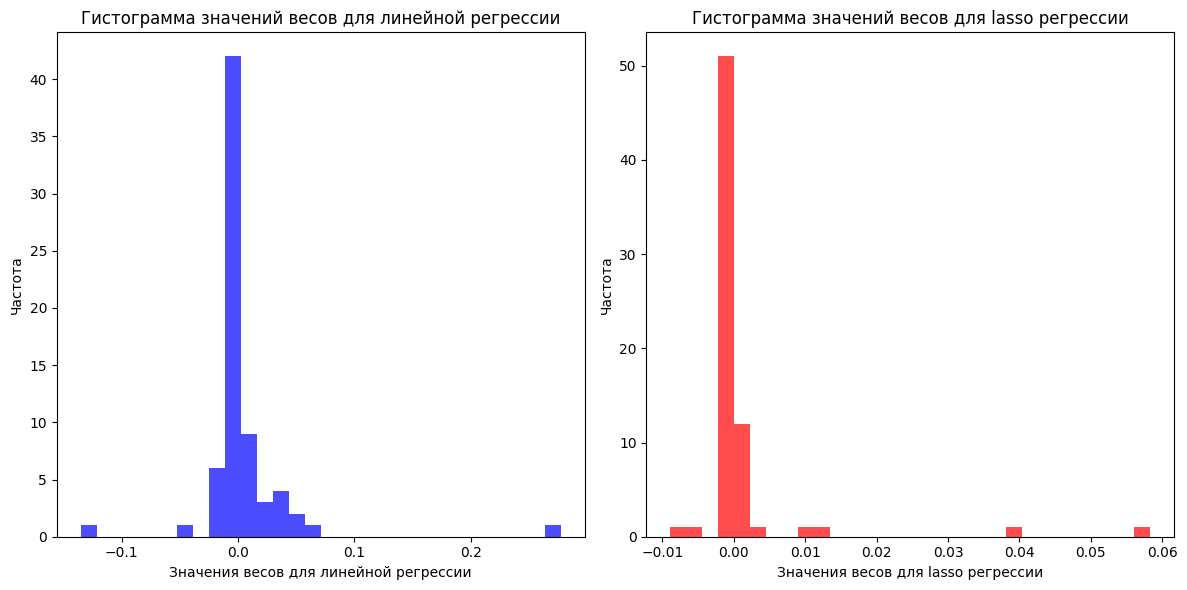

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(linear_reg.coef_, bins = 30, color = 'blue', alpha = 0.7)
plt.title('Гистограмма значений весов для линейной регрессии')
plt.xlabel('Значения весов для линейной регрессии')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(lasso_grid.best_estimator_.coef_, bins = 30, color = 'red', alpha = 0.7)
plt.title('Гистограмма значений весов для lasso регрессии')
plt.xlabel('Значения весов для lasso регрессии')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

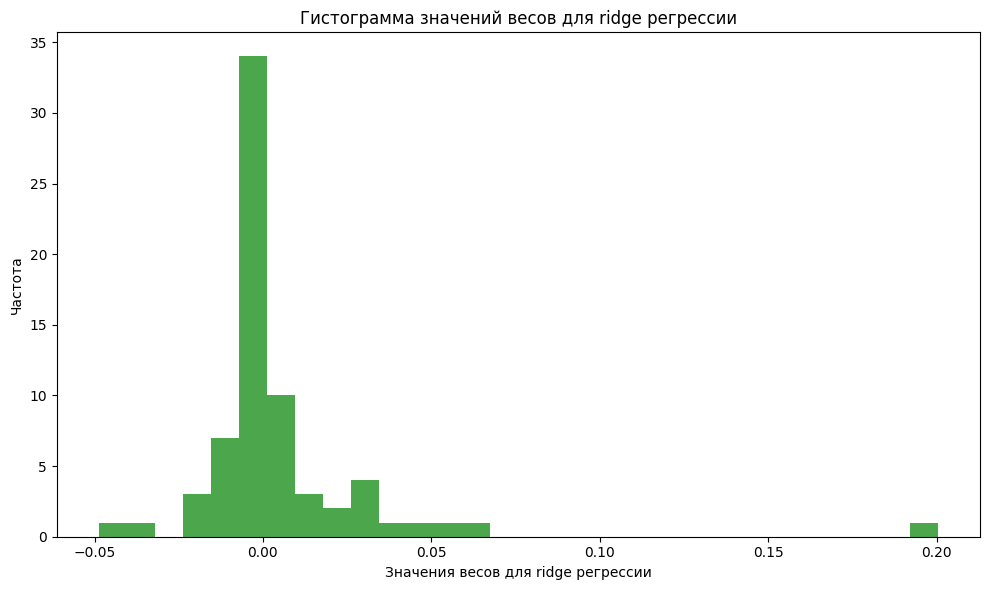

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(ridge_grid.best_estimator_.coef_, bins = 30, color = 'green', alpha = 0.7)
plt.title('Гистограмма значений весов для ridge регрессии')
plt.xlabel('Значения весов для ridge регрессии')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()